In [4]:
library(DOSE)
library(enrichplot)
library(clusterProfiler)
library(GSEABase)
library(org.Hs.eg.db)
library(dplyr)
library(ggplot2)
library("readxl")

In [2]:
#.libPaths("/pkg/R-4.1.0-0/lib/R/library")

In [5]:

my_data_metapredict <- read_excel("../MasterTable_canonicalHuman_qIDR.xlsx")

overlapped_names=my_data_metapredict[my_data_metapredict$overlap_metapredict == "yes", ]
x=data.frame(overlapped_names$gene_symbol,overlapped_names$`min(p-val)`)
x=x[!duplicated(x$overlapped_names.gene_symbol), ]

colnames(x)=c("Gene", "metric")
newdata <- x[order(x$metric),] 
newdata$metric=-log10(newdata$metric)


## Extract the foldchanges
foldchanges <- newdata$metric

## Name each fold change with the corresponding Entrez ID
names(foldchanges) <- newdata$Gene

foldchanges <- sort(foldchanges, decreasing = TRUE)



# GSEA using gene sets associated with BP Gene Ontology terms
gseaGO <- gseGO(geneList = foldchanges, 
                OrgDb = org.Hs.eg.db, 
                ont = 'BP', 
                nPerm = 1000, 
                minGSSize = 20, 
                pvalueCutoff = 0.05,
                verbose = FALSE,keyType = 'SYMBOL') 


gseaGO_results <- gseaGO@result


# GSEA analysis for Rna Binding Proteins 
c2 <- read.gmt("../gmt_files/rna_binding_all.gmt.txt")

msig <- GSEA(foldchanges, TERM2GENE=c2, verbose=FALSE)

gseaGO_results <- msig@result


Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (85.51% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties 

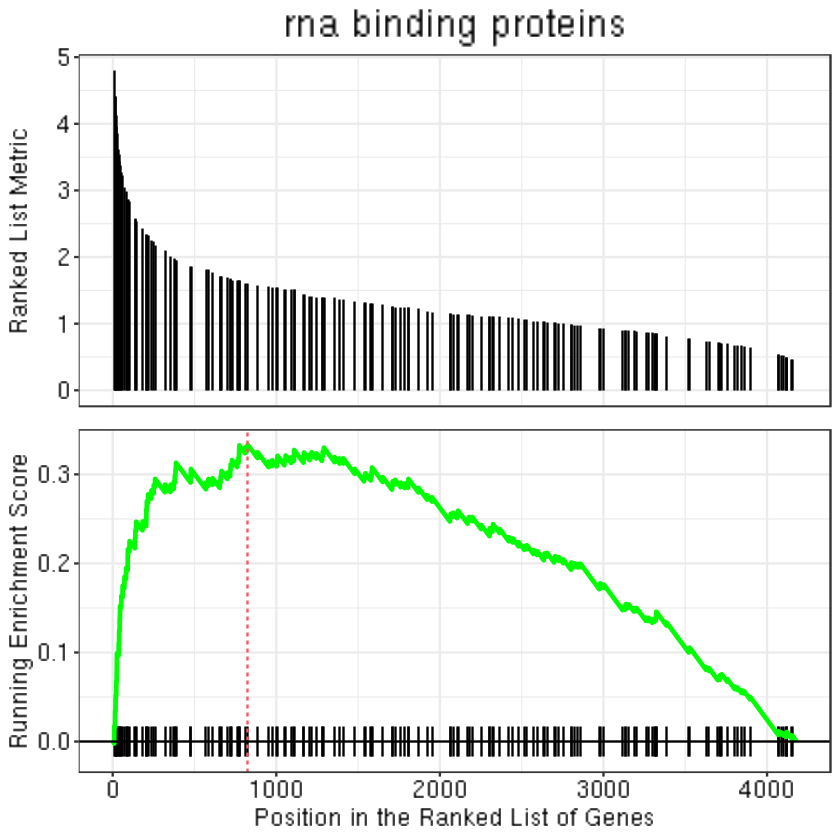

In [6]:
## GSEA plots for RNA binding proteins
gseaplot(msig, geneSetID = 'rna binding proteins',title = msig$Description[1])



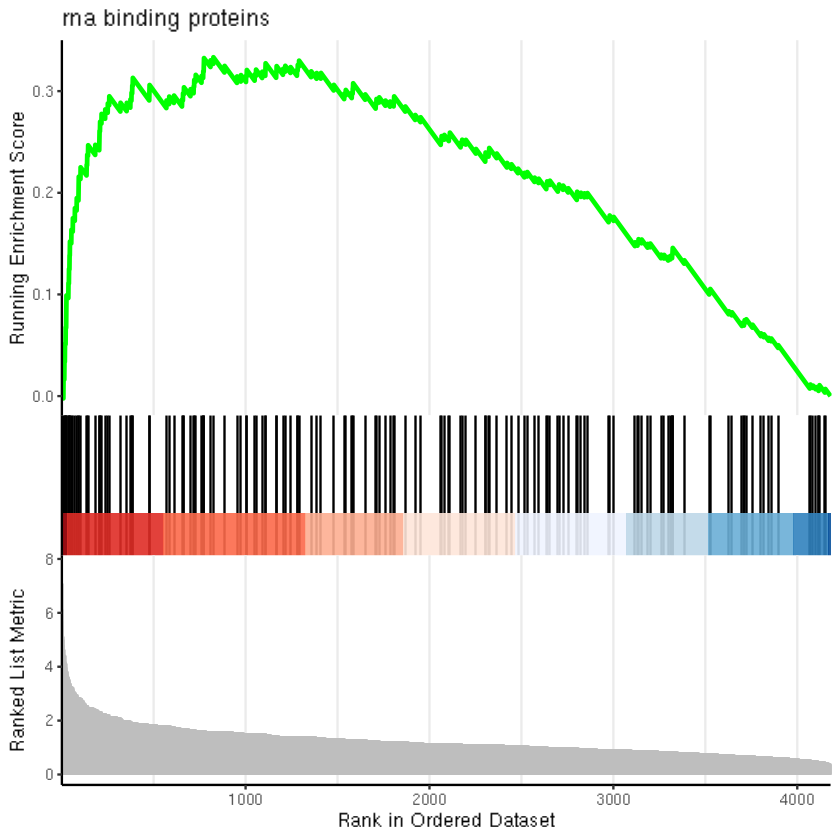

In [7]:
gseaplot2(msig, geneSetID = 1, title = msig$Description[1])


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (85.51% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


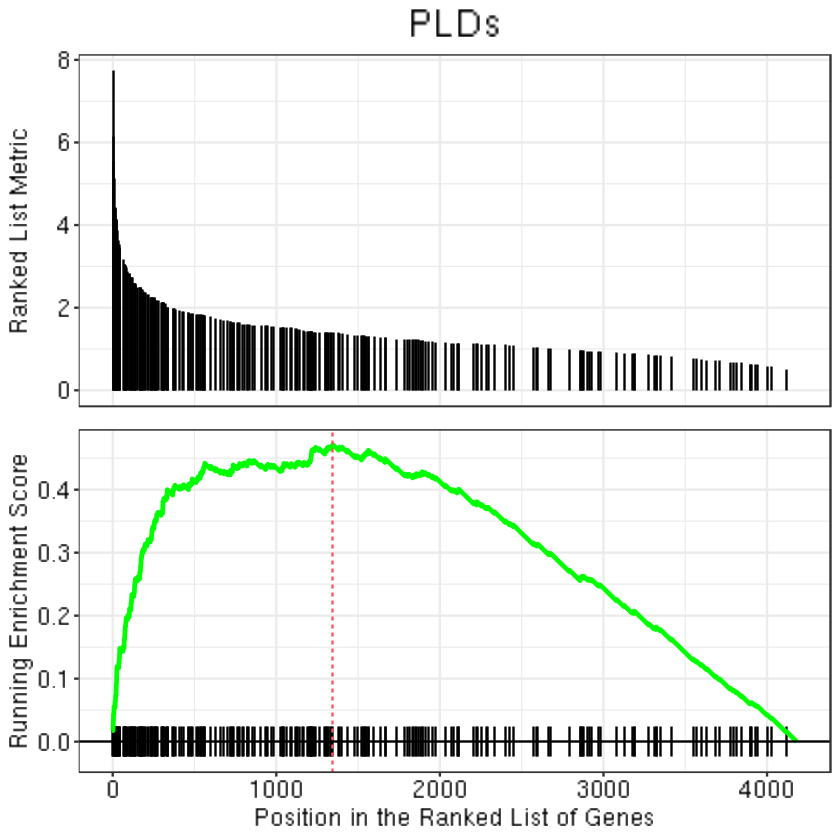

In [8]:
#GSEA analysis for GMTs
c2 <- read.gmt("../gmt_files/PLDs.gmt.txt")

msig <- GSEA(foldchanges, TERM2GENE=c2, verbose=FALSE)

gseaplot(msig, geneSetID = 'PLDs',title = msig$Description[1])


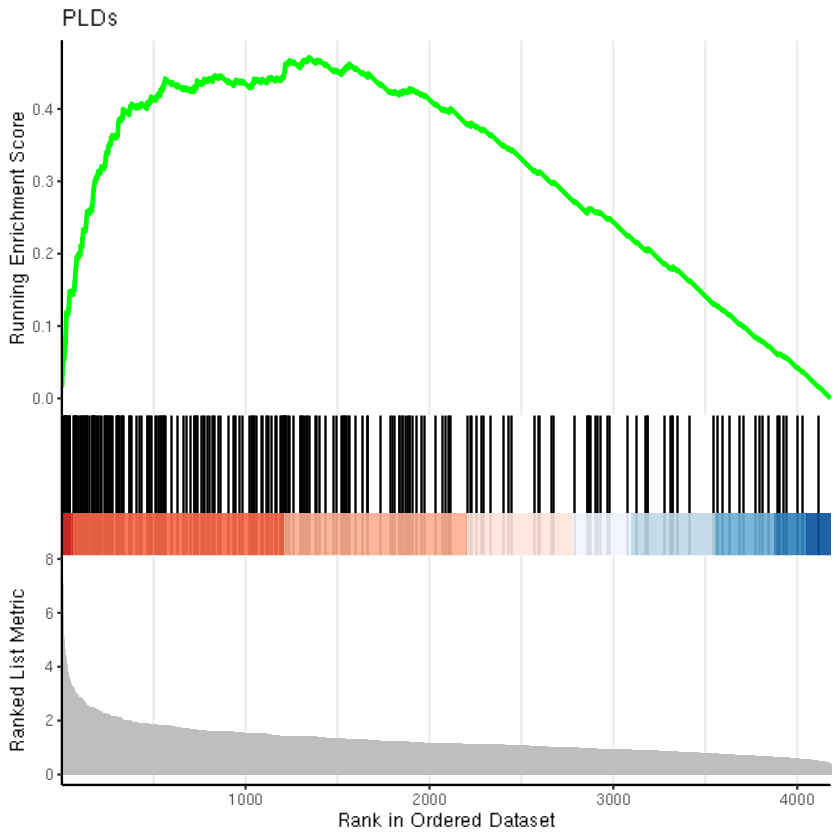

In [9]:

gseaplot2(msig, geneSetID = 1, title = msig$Description[1])


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (85.51% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


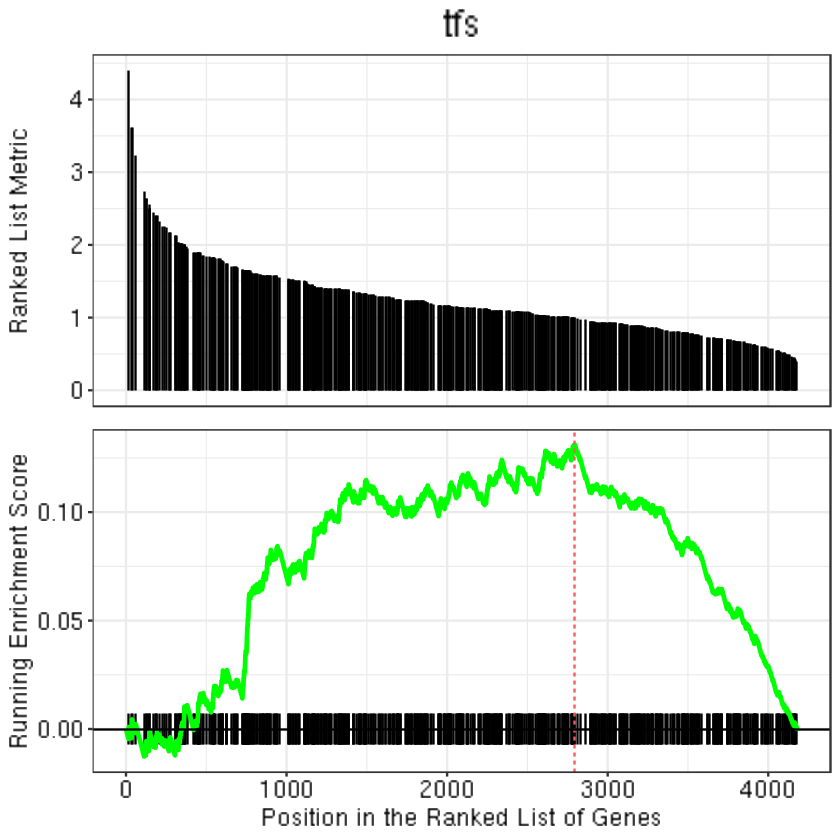

In [10]:
##GSEA analysis for TFs
c2 <- read.gmt("../gmt_files/tfs.gmt.txt")

msig <- GSEA(foldchanges, TERM2GENE=c2, verbose=FALSE,maxGSSize = 700, pvalueCutoff = 1)
gseaGO_results <- msig@result

gseaplot(msig, geneSetID = 'tfs',title = msig$Description[1])




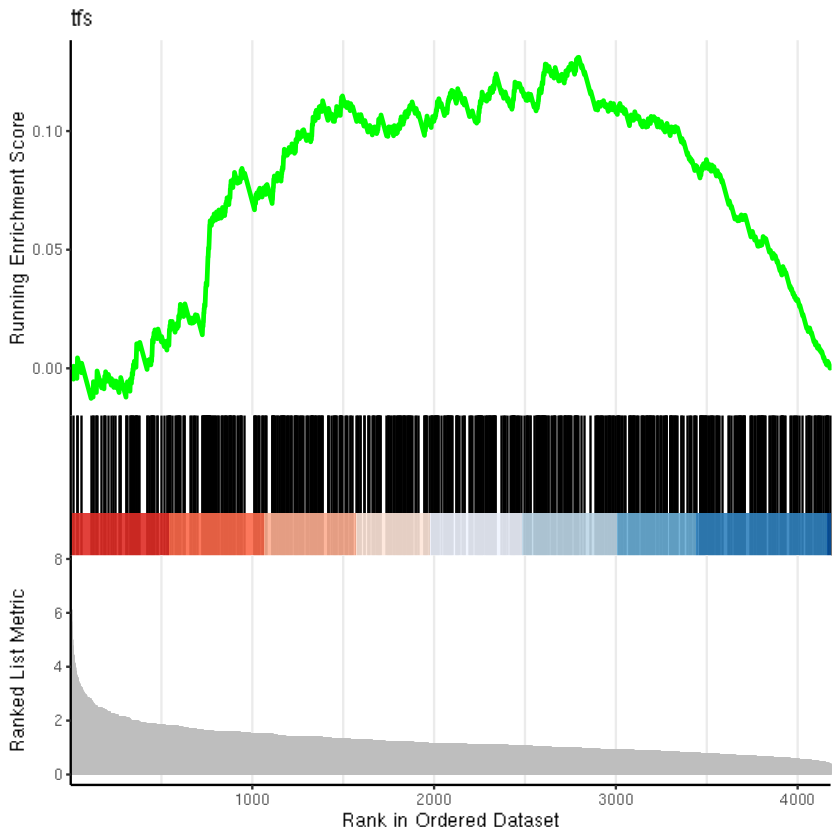

In [11]:
gseaplot2(msig, geneSetID = 1, title = msig$Description[1])
